# Imports

In [1]:
import numpy as np
import pandas as pd
import swifter
# import pandas_profiling
import pprint
import requests
import pickle
from collections import OrderedDict

from datetime import datetime
import time

import seaborn as sns
import matplotlib.pyplot as plt

# import geopandas as gpd
# from geopandas import GeoDataFrame
import descartes

## Jupyter Configurations

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_columns', None)

%matplotlib inline

## Function Definitions

In [3]:
def nominatim_query(query):
    params = OrderedDict()
    params['format'] = 'json'
    params['limit'] = 1
    params['dedupe'] = 0
    params['polygon_geojson'] = 1
    params['q'] = query

    url = 'https://nominatim.openstreetmap.org/search'
    prepared_url = requests.Request('GET', url, params=params).prepare().url

    response = requests.get(url, params=params)
    response_json = response.json()
    return shape(response_json[0]['geojson'])

def make_point(row):
    return Point(row['Start_Lng'], row['Start_Lng'])

## Read Data

In [4]:
%%time

infile = open('US_Accidents_Dec19', 'rb')
df = pickle.load(infile)
infile.close()

print('Imported {:,} rows.'.format(len(df)))

Imported 2,974,335 rows.
CPU times: user 2.45 s, sys: 1.58 s, total: 4.03 s
Wall time: 4.27 s


In [ ]:
%%time

# Go through every row, and make a point out of its lat and lon
df['Start_points'] = df.swifter.apply(make_point, axis=1)

Text(0.5, 1.0, 'Incident Count by Hour of Day')

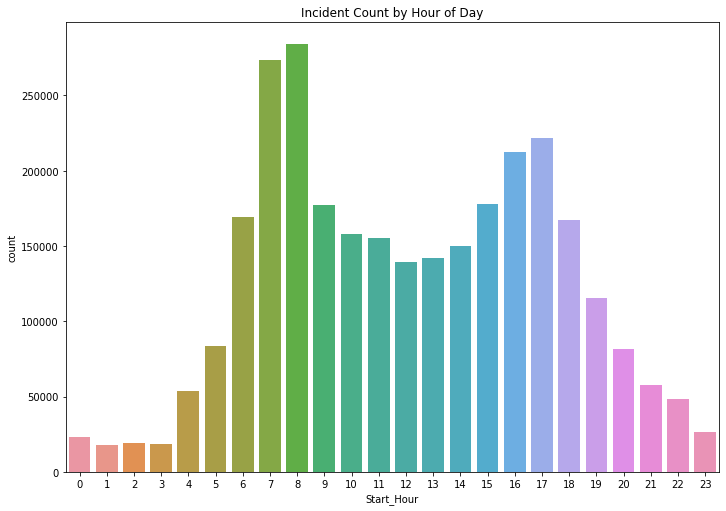

In [5]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x=df["Start_Hour"]).set_title('Incident Count by Hour of Day')

Text(0.5, 1.0, 'Incident Count by Day of Week')

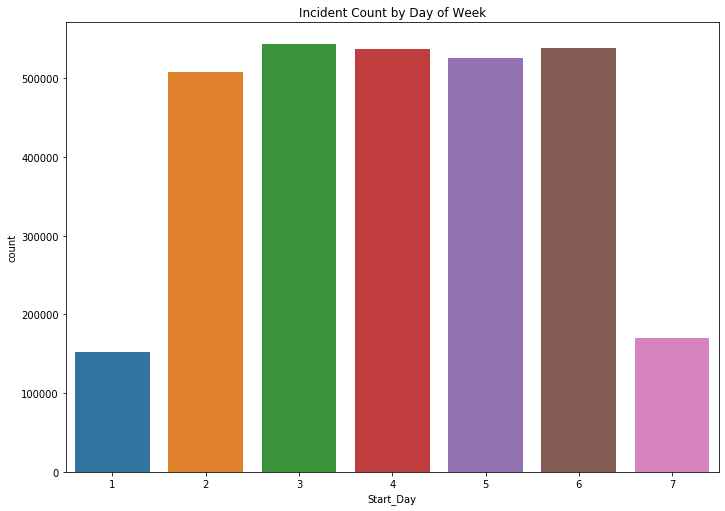

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x=df["Start_Day"]).set_title('Incident Count by Day of Week')

Text(0.5, 1.0, 'Incident Count by Month of Year')

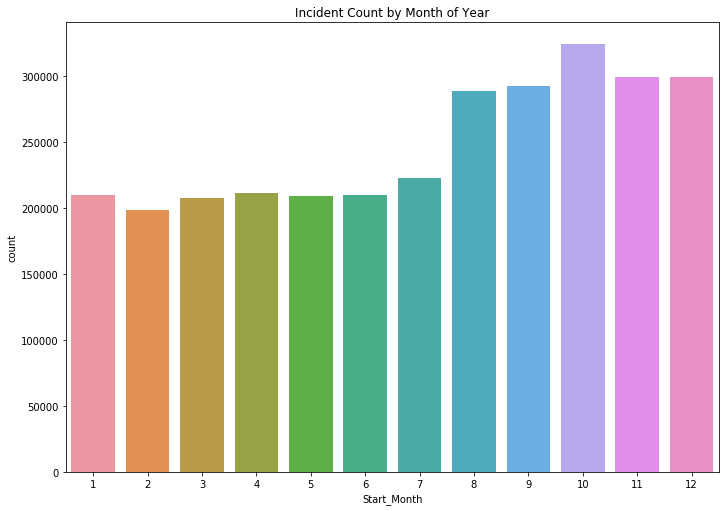

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x=df["Start_Month"]).set_title('Incident Count by Month of Year')

Text(0.5, 1.0, 'Incident Count by State')

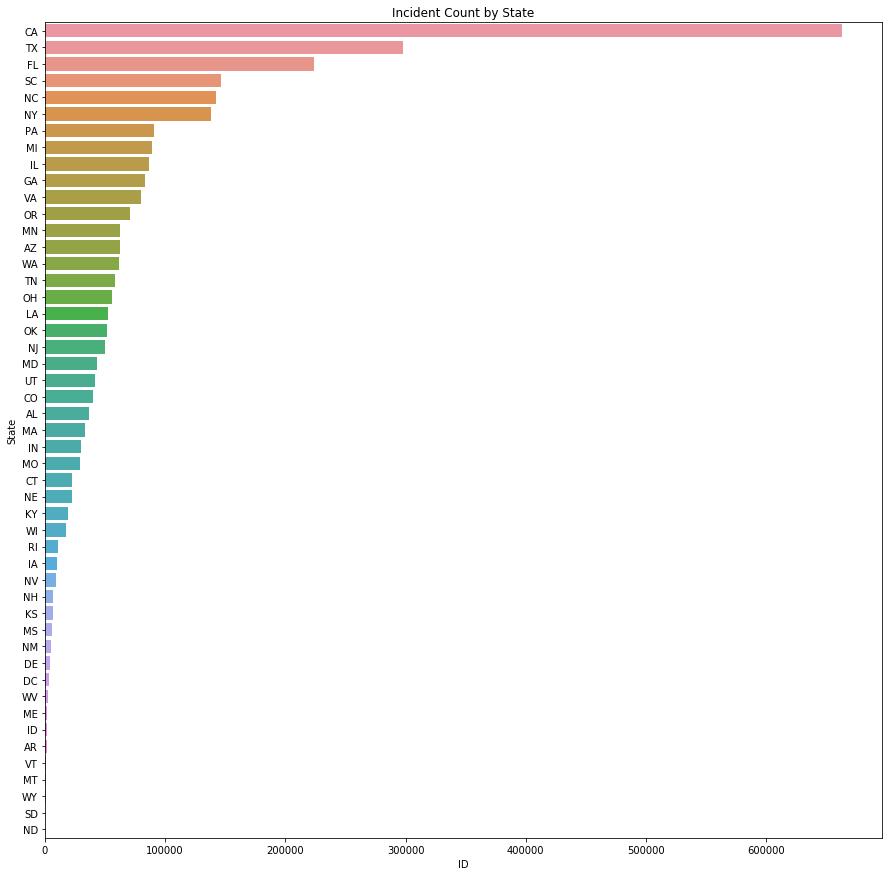

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
sns.barplot(y="State", x="ID", data=df.groupby('State')['ID'].count().reset_index().sort_values(by = "ID",ascending=False)).set_title('Incident Count by State')

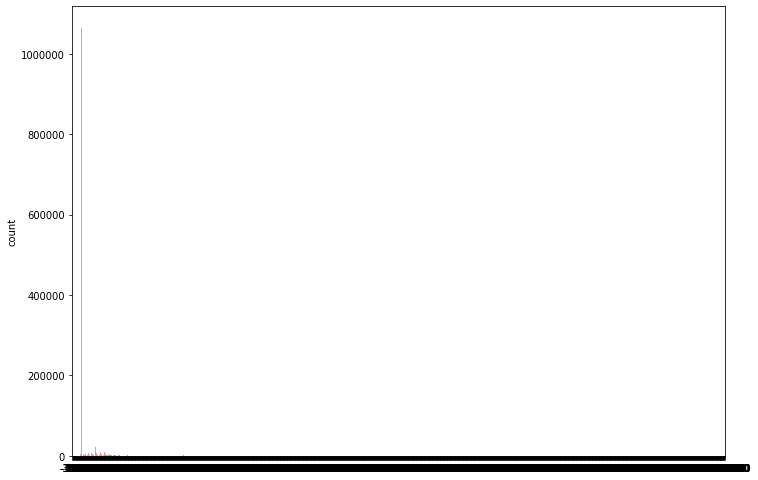

In [9]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x=(df['End_Time']-df['Start_Time']).astype('timedelta64[m]'))

In [ ]:
df['End_Time']-df['Start_Time']

In [ ]:
df[['Severity','Start_Time','End_Time']].head()

In [ ]:
# geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
# gdf = GeoDataFrame(df, geometry=geometry)   

# #this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

(<Figure size 1080x720 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e258e50>,
       dtype=object))

(array([ 56.,  79.,  64.,  58.,  71.,  90.,  79., 105.,  97.,  91.,  97.,
         81.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 12 Patch objects>)

Text(0.5, 1.0, 'Accident Count by Month with Severity 1')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Accident Count')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

(array([135962., 129973., 135713., 139305., 137597., 132654., 144107.,
        193419., 201901., 229577., 205421., 207781.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 12 Patch objects>)

Text(0.5, 1.0, 'Accident Count by Month with Severity 2')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Accident Count')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 6 Text yticklabel objects>)

(array([66865., 62043., 64618., 65642., 64016., 69845., 70772., 87390.,
        82684., 86064., 85371., 82310.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 12 Patch objects>)

Text(0.5, 1.0, 'Accident Count by Month with Severity 3')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Accident Count')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 6 Text yticklabel objects>)

(array([7089., 6554., 7032., 6758., 7376., 7436., 8001., 7998., 7748.,
        8793., 8166., 9386.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 12 Patch objects>)

Text(0.5, 1.0, 'Accident Count by Month with Severity 4')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Accident Count')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 6 Text yticklabel objects>)

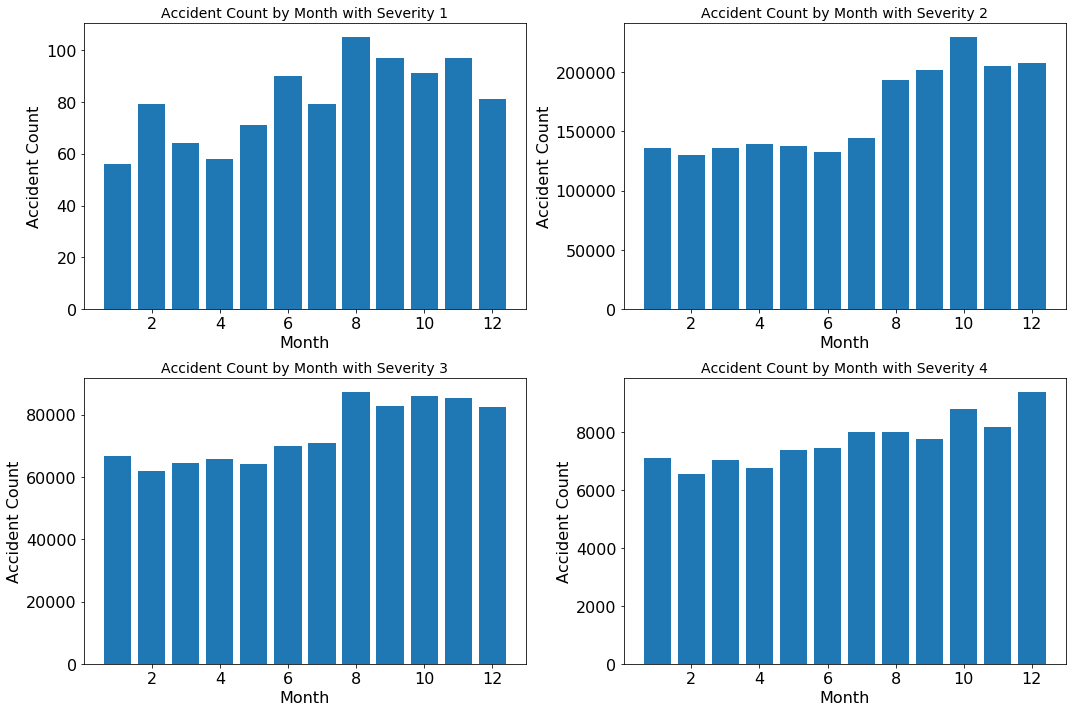

In [10]:
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['Start_Time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

(<Figure size 1080x720 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a248a2f90>,
       dtype=object))

(array([190., 153., 169., 152., 183.,  62.,  59.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

Text(0.5, 1.0, 'Accident Count by Day with Severity 1')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Accident Count')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text xticklabel objects>)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text yticklabel objects>)

(array([352093., 378499., 374204., 362216., 366648.,  84691.,  75059.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

Text(0.5, 1.0, 'Accident Count by Day with Severity 2')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Accident Count')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text xticklabel objects>)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 <a list of 9 Text yticklabel objects>)

(array([140436., 150179., 148761., 149546., 156042.,  75630.,  67026.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

Text(0.5, 1.0, 'Accident Count by Day with Severity 3')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Accident Count')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text xticklabel objects>)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]),
 <a list of 10 Text yticklabel objects>)

(array([14536., 14894., 14340., 14224., 14876.,  9966.,  9501.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

Text(0.5, 1.0, 'Accident Count by Day with Severity 4')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Accident Count')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text xticklabel objects>)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 <a list of 9 Text yticklabel objects>)

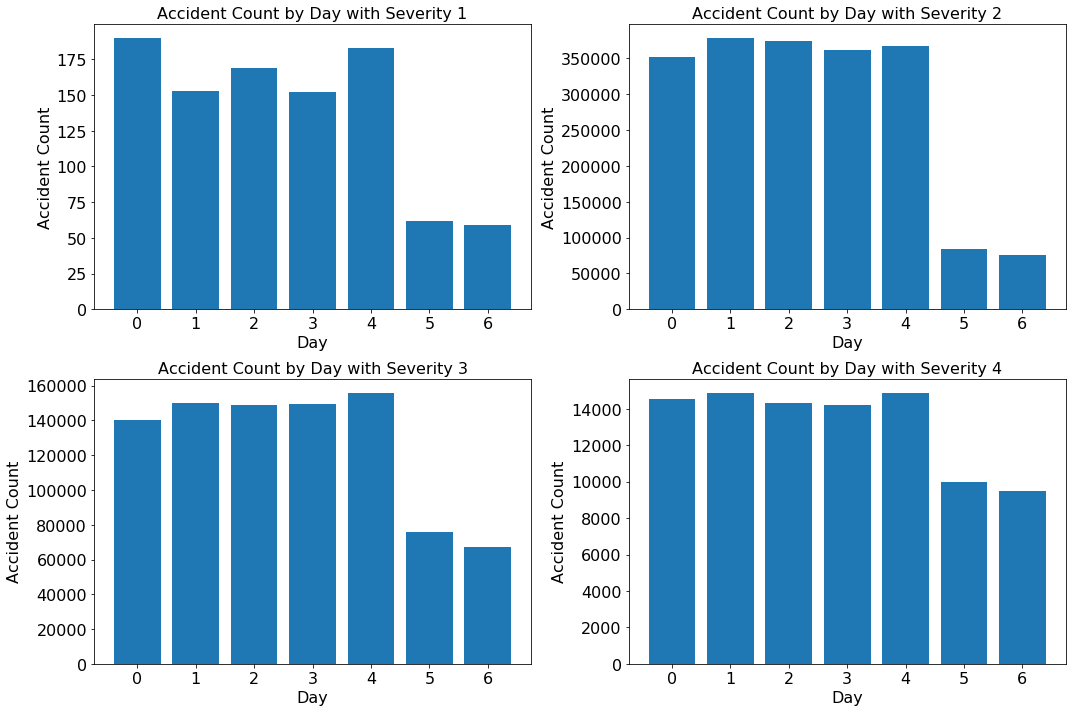

In [11]:
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(df.loc[df["Severity"] == s]['DayOfWeek'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(s), fontsize=16)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a20b7d590>)

Text(0.5, 0, 'Weather Condition')

Text(0, 0.5, 'Accident Count')

Text(0.5, 1.0, '20 of The Main Weather Conditions for Accidents of Severity 1')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text yticklabel objects>)

(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1e3a0190>)

Text(0.5, 0, 'Weather Condition')

Text(0, 0.5, 'Accident Count')

Text(0.5, 1.0, '20 of The Main Weather Conditions for Accidents of Severity 2')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text yticklabel objects>)

(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1e31ffd0>)

Text(0.5, 0, 'Weather Condition')

Text(0, 0.5, 'Accident Count')

Text(0.5, 1.0, '20 of The Main Weather Conditions for Accidents of Severity 3')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 7 Text yticklabel objects>)

(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1e370a50>)

Text(0.5, 0, 'Weather Condition')

Text(0, 0.5, 'Accident Count')

Text(0.5, 1.0, '20 of The Main Weather Conditions for Accidents of Severity 4')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

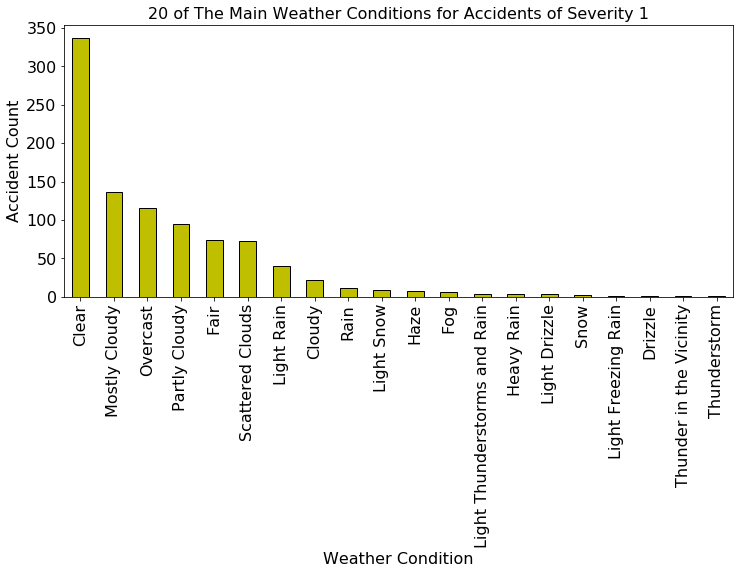

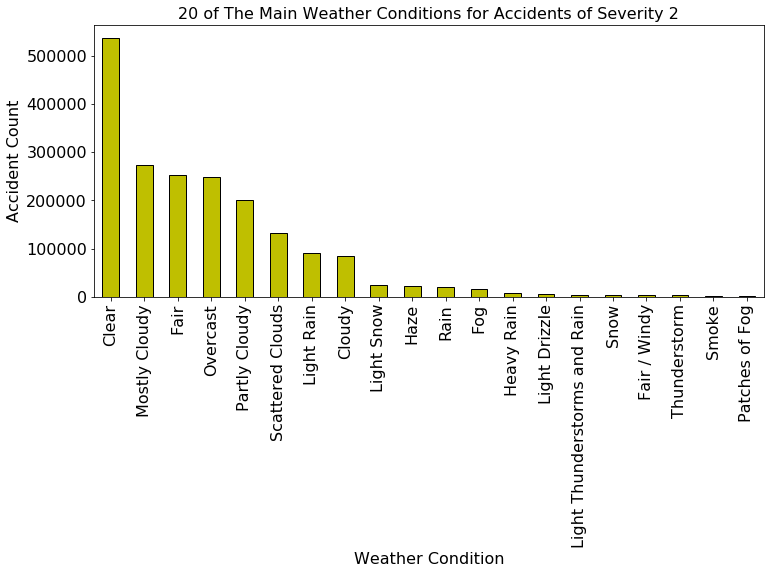

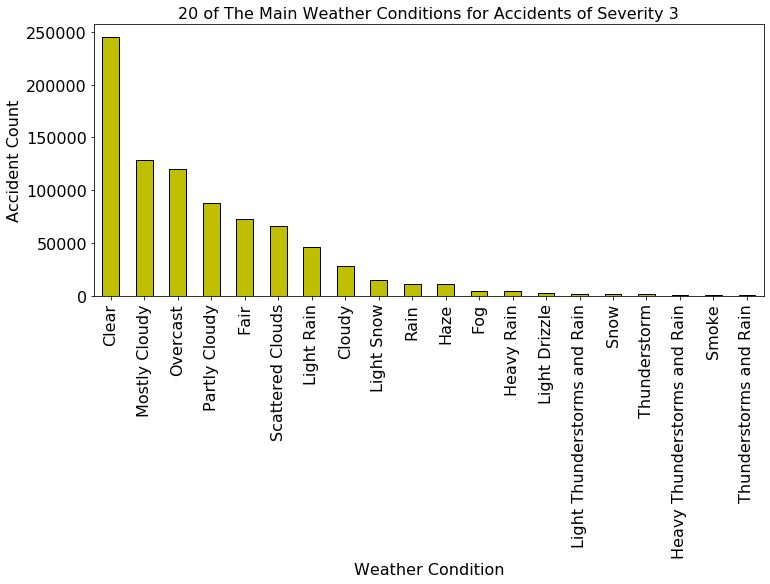

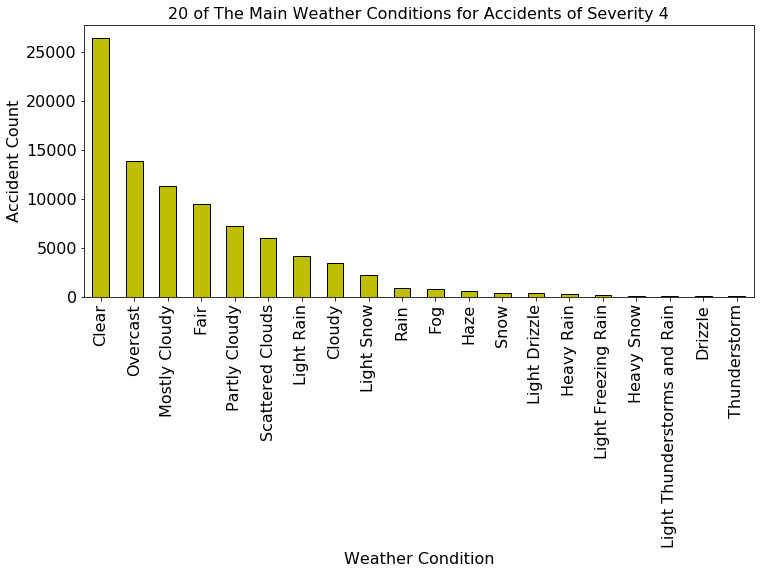

In [12]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

In [ ]:
df.loc[df["State"] == 'CA']['State'].value_counts()

In [ ]:
df['State'].value_counts()